[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

#Train YOLOv8 Object Detection on a Custom Dataset

---


Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Sep 25 05:28:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.8/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="V9hQZtuvo1ZQ5JTQ2FmC")
project = rf.workspace("airlangga-vipre").project("egg-classification-utrhr")
version = project.version(5)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Egg-Classification-5 in yolov8:: 100%|██████████| 356/356 [00:00<00:00, 3459.12it/s]


In [ ]:
!pip install -U ultralytics
!pip install -U albumentations

  Using cached ultralytics-8.2.100-py3-none-any.whl.metadata (39 kB)
Using cached ultralytics-8.2.100-py3-none-any.whl (874 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


## Custom Training

hyperparameters: https://docs-ultralytics-com.translate.goog/modes/train/?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc

Train: epoch, batch, lr0, lrf, overlap_mask, plots

Validation: batch, iou

Predict: iou, agnostic_nms

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 lr0=0.1 lrf=0.1 batch=32 overlap_mask=False plots=True

/content
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Egg-Classification-5/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=False, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

In [ ]:
!ls {HOME}/runs/detect/train4/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch450.jpg
confusion_matrix.png				    R_curve.png       train_batch451.jpg
events.out.tfevents.1727244099.eaedddddbd1f.9621.0  results.csv       train_batch452.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


In [ ]:
# Step 1: Zip the directory
!zip -r train4_files.zip {HOME}/runs/detect/train4/

# Step 2: Download the zipped file
from google.colab import files
files.download('train4_files.zip')

  adding: content/runs/detect/train4/ (stored 0%)
  adding: content/runs/detect/train4/confusion_matrix.png (deflated 30%)
  adding: content/runs/detect/train4/R_curve.png (deflated 16%)
  adding: content/runs/detect/train4/val_batch0_pred.jpg (deflated 7%)
  adding: content/runs/detect/train4/weights/ (stored 0%)
  adding: content/runs/detect/train4/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train4/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train4/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/train4/args.yaml (deflated 52%)
  adding: content/runs/detect/train4/train_batch2.jpg (deflated 6%)
  adding: content/runs/detect/train4/labels.jpg (deflated 39%)
  adding: content/runs/detect/train4/PR_curve.png (deflated 26%)
  adding: content/runs/detect/train4/labels_correlogram.jpg (deflated 42%)
  adding: content/runs/detect/train4/results.csv (deflated 86%)
  adding: content/runs/detect/train4/results.png (deflated 8%)
  adding: content

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content


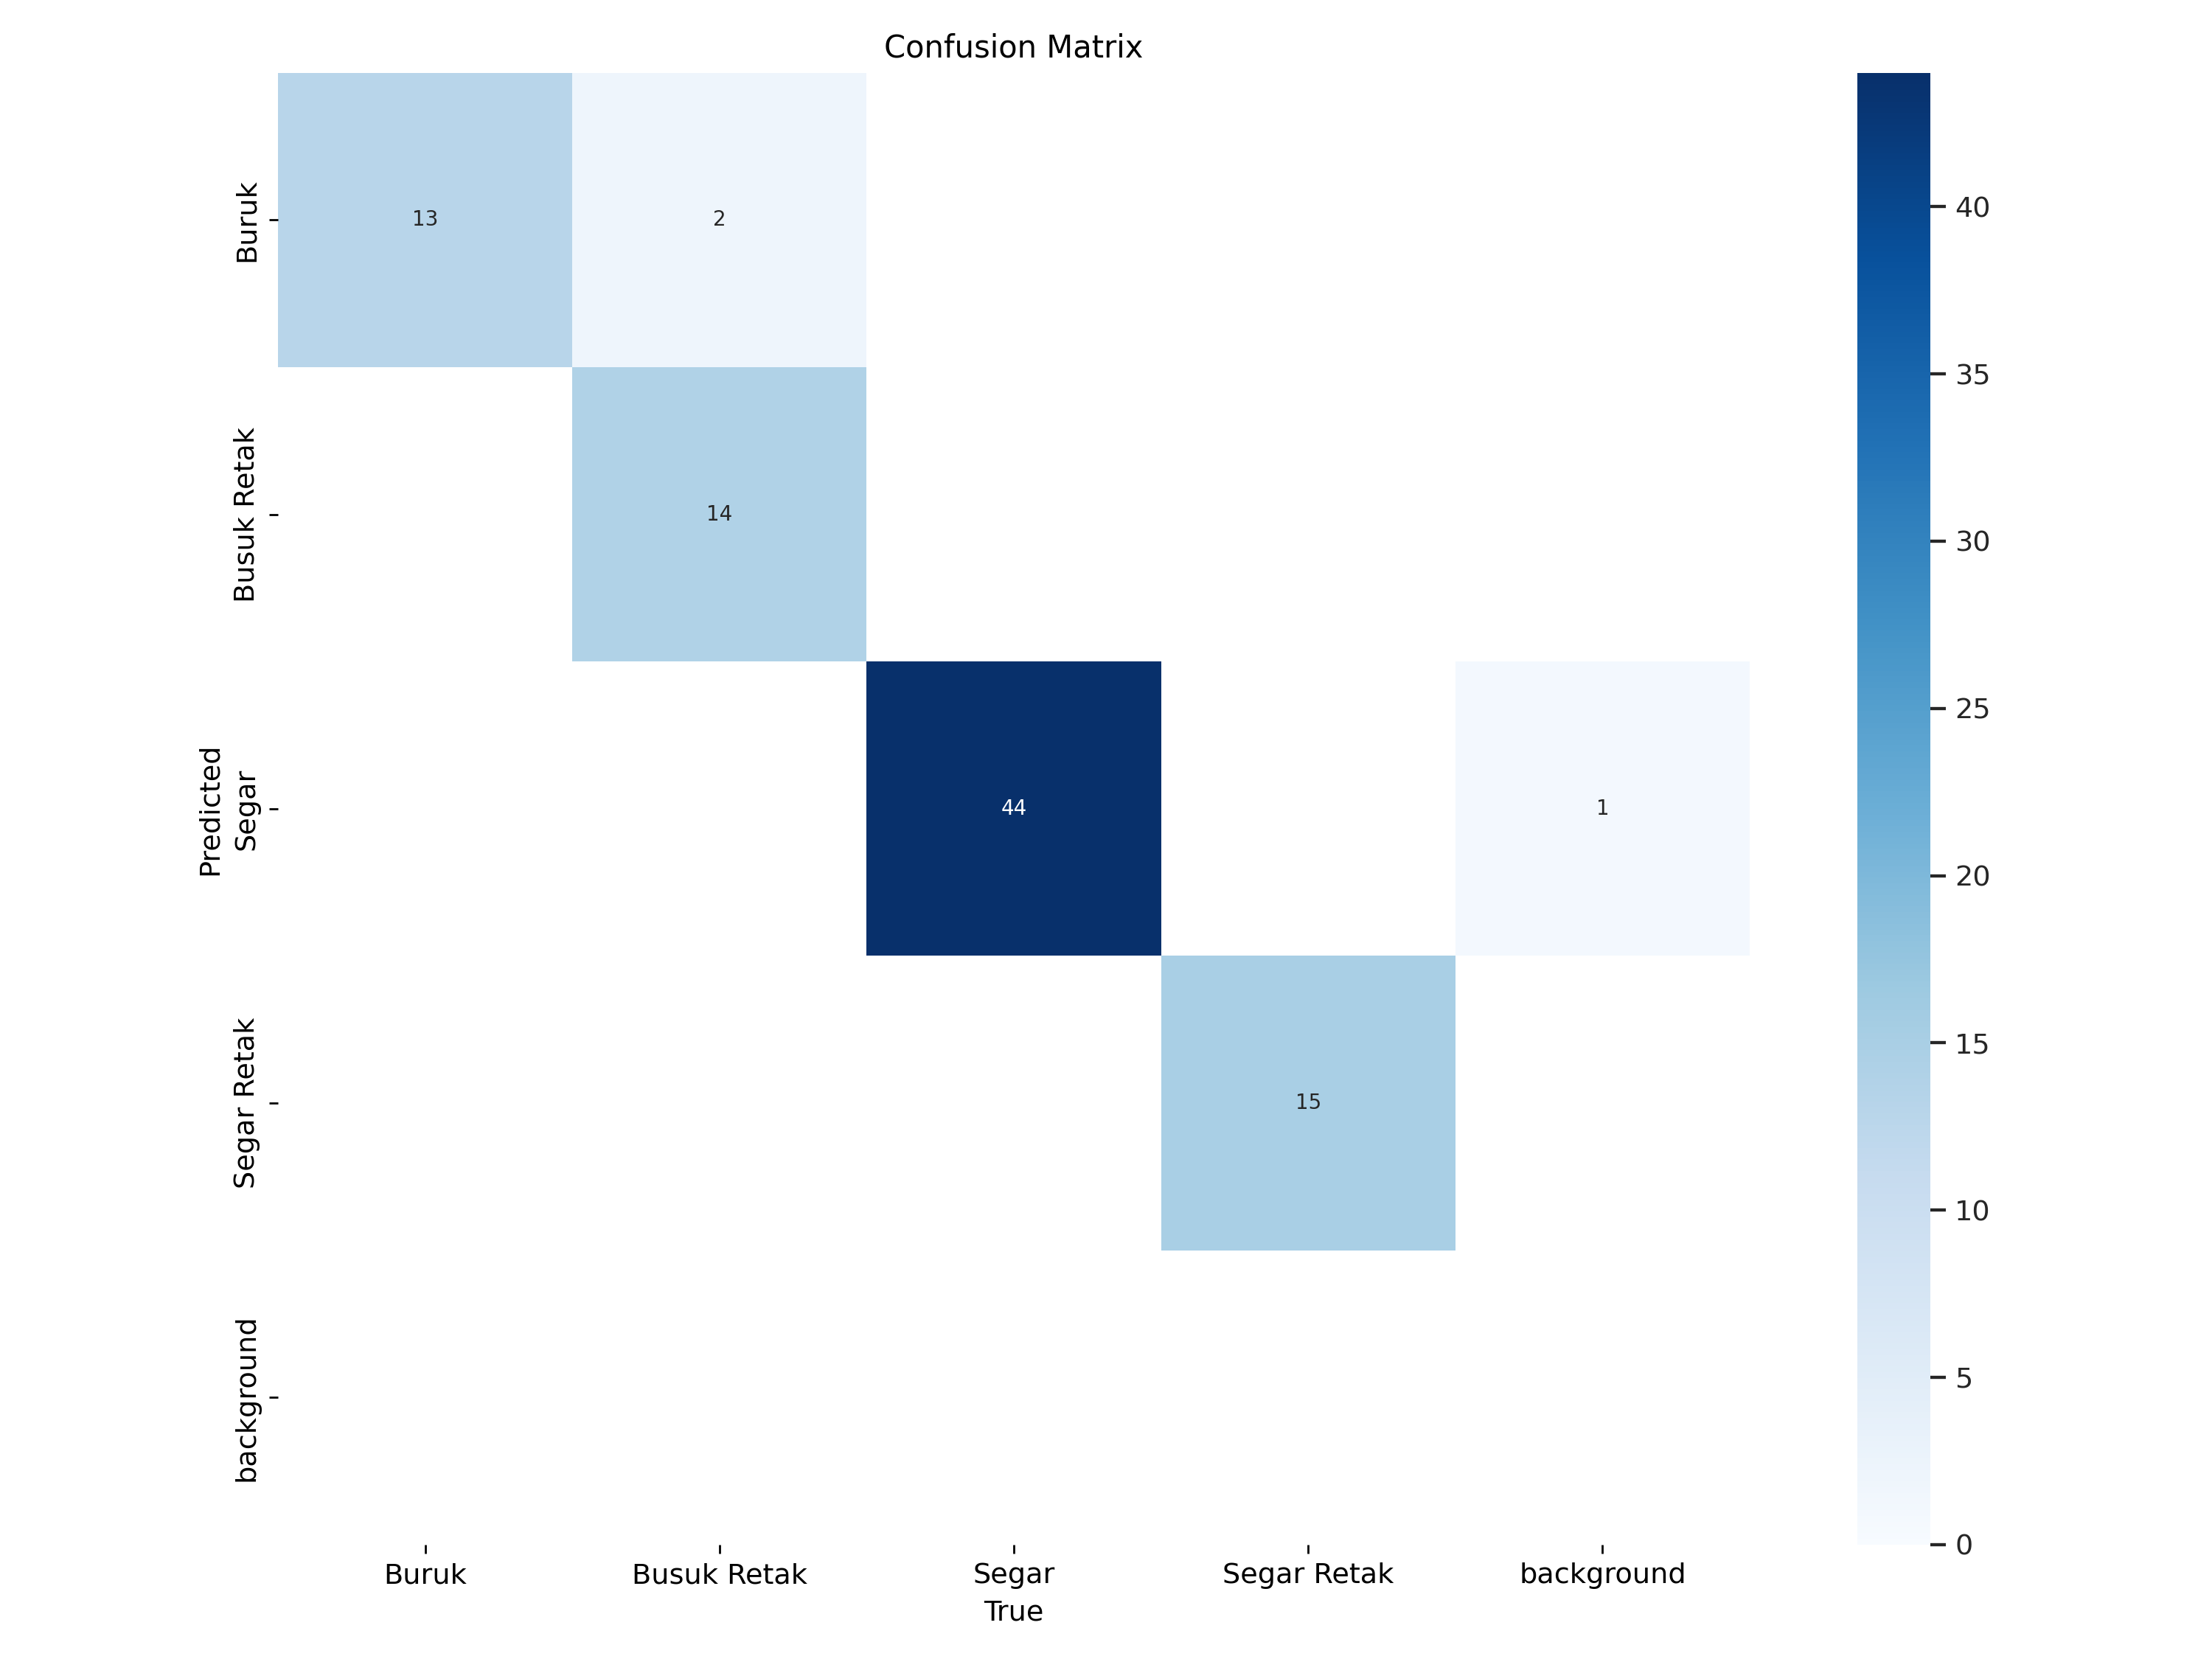

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


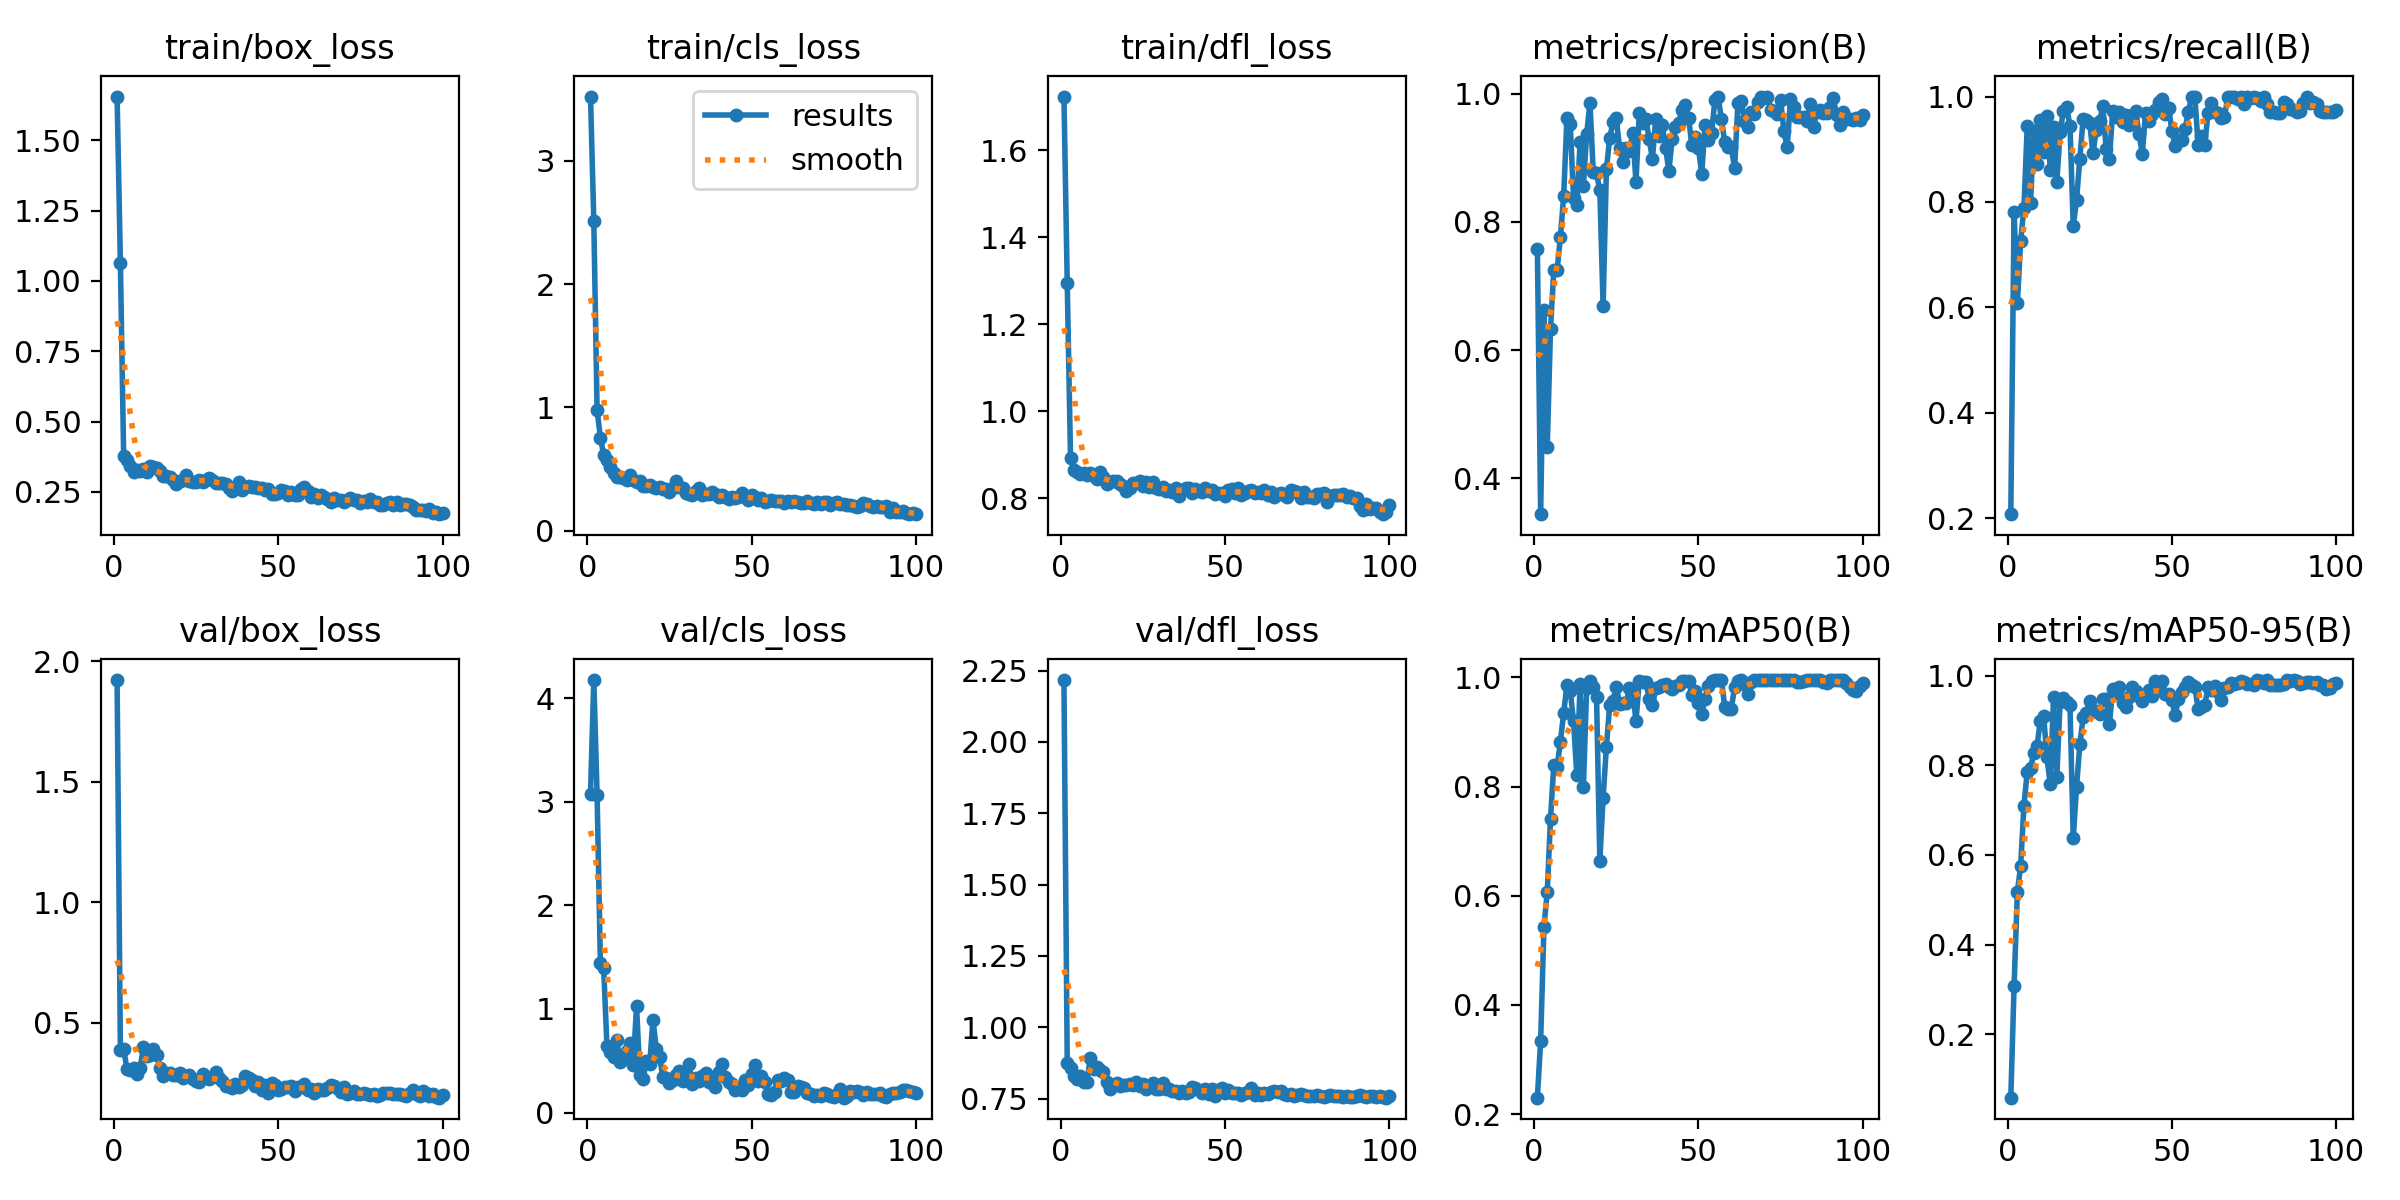

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content


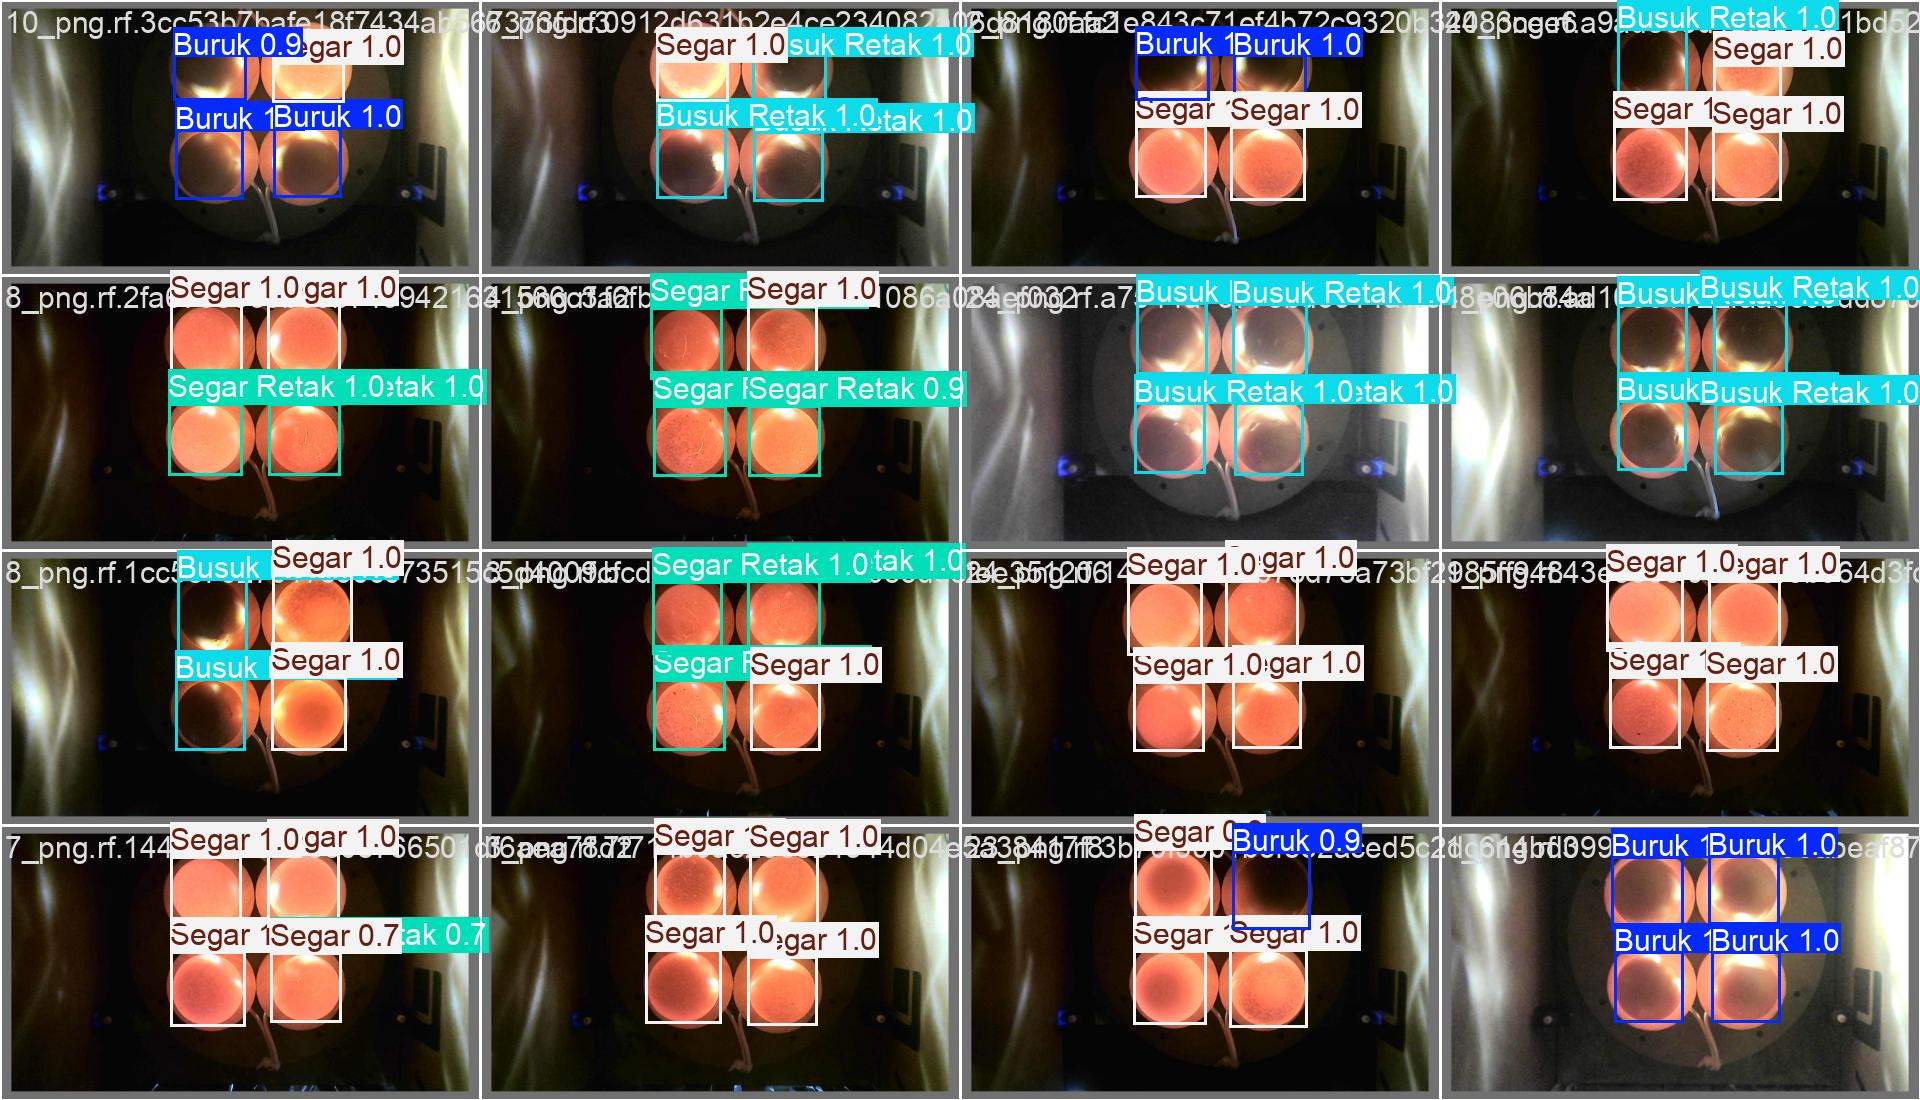

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml batch=32 iou=0

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Egg-Classification-5/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100% 22/22 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.96s/it]
                   all         22         88      0.986       0.97      0.995      0.992
                 Buruk         22         13      0.969          1      0.995      0.995
           Busuk Retak         22         16          1      0.939      0.995      0.995
                 Segar         22         44      0.974          1      0.995      0.991
           Segar Retak         22         15          1       0.94      0.995      0.987
Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 47.6ms postprocess per image
Results saved to runs/detect/

## Predict: Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images iou=0 agnostic_nms=True save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/8 /content/datasets/Egg-Classification-5/test/images/12_png.rf.bb6c2b8d4b607a7b43d99c6f3caf0e5f.jpg: 384x640 2 Busuk Retaks, 2 Segars, 110.7ms
image 2/8 /content/datasets/Egg-Classification-5/test/images/19_png.rf.0fbd0ef90360ea72e0990f7771560109.jpg: 384x640 1 Busuk Retak, 3 Segars, 10.7ms
image 3/8 /content/datasets/Egg-Classification-5/test/images/1_png.rf.59533d8758a1e2e9621482875c70d613.jpg: 384x640 4 Segar Retaks, 10.7ms
image 4/8 /content/datasets/Egg-Classification-5/test/images/24_png.rf.f4d55c36fce194e998a05b9ef9efdfcb.jpg: 384x640 4 Segar Retaks, 10.7ms
image 5/8 /content/datasets/Egg-Classification-5/test/images/2_png.rf.ce5df4d8ed728bf2e2f318533192e6f1.jpg: 384x640 4 Segars, 10.7ms
image 6/8 /content/datasets/Egg-Classification-5/test/images/5_png.

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/airlangga-vipre/egg-classification-utrhr/5
Share your model with the world at: https://universe.roboflow.com/airlangga-vipre/egg-classification-utrhr/model/5
